In [1]:
import scipy.stats
import numpy as np
import math
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import mysql.connector
import mysql.connector as mysql
import MySQLdb
import pyodbc
import sqlalchemy
from joblib import dump, load

In [2]:
# Establish the connection
server = 'gen10-data-fundamentals-21-11-sql-server.database.windows.net'
database = 'Jadr-SQL-Database'
username = 'gen10dbadmin'
password = 'NOi2KIaUiKtV0AO2_K-qC4SoI_oUvepg'
driver= '{ODBC Driver 17 for SQL Server}'

conn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+password)

# Select table here + input proper column names
sql_query1 = pd.read_sql_query ('''SELECT * FROM CAAsthmaData''', conn)
sql_query2 = pd.read_sql_query ('''SELECT * FROM AirQualityDataCounty''', conn)
sql_query3 = pd.read_sql_query ('''SELECT * FROM CensusIndustryData''', conn)
sql_query4 = pd.read_sql_query('''SELECT * FROM County''',conn)
sql_query5 = pd.read_sql_query('''SELECT * FROM State''',conn)

asthma = pd.DataFrame(sql_query1, columns = ['ASTHMA_ID', 'COUNTY_ID', 'YEAR','NUM_ED_VISITS','AGE_ADJ_ED_VISITS','AQ_ID'])
airq = pd.DataFrame(sql_query2, columns = ['AQ_ID','COUNTY_ID','YEAR','LEAD_MEAN','LEAD_1STMAX','LEAD_99PERC','LEAD_STD','LEAD_2NDMAX','LEAD_METHOD_ID','LEAD_METRIC_ID','LEAD_UNITS_ID','NO2_MEAN','NO2_1STMAX','NO2_99PERC','NO2_STD','NO2_2NDMAX','NO2_METHOD_ID','NO2_METRIC_ID','NO2_UNITS_ID','OZONE_MEAN','OZONE_1STMAX','OZONE_99PERC','OZONE_STD','OZONE_2NDMAX','OZONE_METHOD_ID','OZONE_METRIC_ID','OZONE_UNITS_ID','PM10_MEAN','PM10_1STMAX','PM10_99PERC','PM10_STD','PM10_2NDMAX','PM10_METHOD_ID','PM10_METRIC_ID','PM10_UNITS_ID','PM25_MEAN','PM25_1STMAX','PM25_99PERC','PM25_STD','PM25_2NDMAX','PM25_METHOD_ID','PM25_METRIC_ID','PM25_UNITS_ID','SO2_MEAN','SO2_1STMAX','SO2_99PERC','SO2_STD','SO2_2NDMAX','SO2_METHOD_ID','SO2_METRIC_ID','SO2_UNITS_ID'])
county = pd.DataFrame(sql_query4, columns = ['COUNTY_ID', 'COUNTY_NAME', 'STATE_ID'])
census = pd.DataFrame(sql_query3,columns = ['CENSUS_ID','COUNTY_ID','YEAR','NAICS2012_LABEL','FIRMALL','RCPALL','FIRMPDEMP','RCPPDEMP','EMP','FIRMNOPD','RCPNOPD'])
state = pd.DataFrame(sql_query5, columns = ['STATE_ID', 'STATE_ABBR', 'STATE_NAME'])

conn.close()

C:\Users\Abigail\anaconda3\envs\powerbi\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Abigail\anaconda3\envs\powerbi\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Abigail\anaconda3\envs\powerbi\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Abigail\anaconda3\envs\powerbi\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy 

In [3]:
train = pd.merge(asthma,airq,on=['AQ_ID'],how='left')
train.drop(['COUNTY_ID_y','YEAR_y'],axis=1,inplace=True)
train.drop(0,axis=0,inplace=True)
train

,ASTHMA_ID,COUNTY_ID_x,YEAR_x,NUM_ED_VISITS,AGE_ADJ_ED_VISITS,AQ_ID,LEAD_MEAN,LEAD_1STMAX,LEAD_99PERC,LEAD_STD,...,PM25_METRIC_ID,PM25_UNITS_ID,SO2_MEAN,SO2_1STMAX,SO2_99PERC,SO2_STD,SO2_2NDMAX,SO2_METHOD_ID,SO2_METRIC_ID,SO2_UNITS_ID
1,2,3085.0,2015,9939,64.3,989.0,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0
2,3,843.0,2015,196,58.4,910.0,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0
3,4,152.0,2015,1044,50.2,886.0,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,9.0,6.0,3.0
4,5,65.0,2015,185,48.0,812.0,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0
5,6,545.0,2015,97,41.4,808.0,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,282,1720.0,2019,1996,40.2,811.0,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0
282,283,1144.0,2019,186,44.0,814.0,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0
283,284,1406.0,2019,2413,29.8,901.0,NaN,NaN,NaN,NaN,...,5.0,1.0,NaN,NaN,NaN,NaN,NaN,9.0,6.0,3.0
284,285,1994.0,2019,743,34.5,937.0,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0


In [4]:
#train.info()

### Model #1 : Impute all nulls w/ mean

In [5]:
# Separate independent from dependent variables 
# Isolate ED visits
aq_factors = train[['NO2_MEAN','NO2_STD','OZONE_MEAN','OZONE_STD','PM25_MEAN','PM25_STD']]
#aq_factors = train[['NO2_MEAN','OZONE_MEAN','PM25_MEAN']]
ed_visits = train[['AGE_ADJ_ED_VISITS']]

In [6]:
# create train + test sets
features = aq_factors.columns
X = aq_factors[features]
y = ed_visits['AGE_ADJ_ED_VISITS'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
# impute null values w/ mean
mean_imp = SimpleImputer(strategy='mean')
X_train.iloc[:,:] = mean_imp.fit_transform(X_train)
X_test.iloc[:,:] = mean_imp.fit_transform(X_test)

Train: 0.11994875900537627
Test:0.05506438792396895


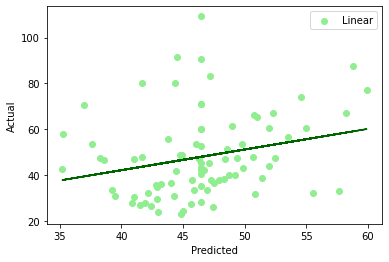

In [8]:
# train model and assess performance
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print('Train: ' + str(reg.score(X_train,y_train)))
print('Test:' + str(reg.score(X_test,y_test)))

y_pred = reg.predict(X_test)
pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

x = pred['Predicted']
y = pred['Actual']
plt.scatter(x,y,color='lightgreen',label='Linear')
m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x+b,color='darkgreen')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.show()

C:\Users\Abigail\anaconda3\envs\powerbi\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Train: 0.11842473013448629
Test: 0.05901111113424473


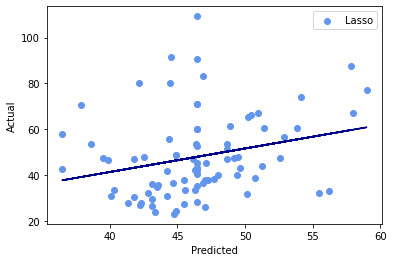

In [9]:
# trying lasso
lasso = linear_model.Lasso(alpha=.01,normalize=True)
lasso.fit(X_train,y_train)
print('Train: ' + str(lasso.score(X_train,y_train)))
print('Test: ' + str(lasso.score(X_test,y_test)))

y_lasso_pred = lasso.predict(X_test)
lasso_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_lasso_pred})

x = lasso_pred['Predicted']
y = lasso_pred['Actual']
plt.scatter(x,y,color='cornflowerblue',label='Lasso')
m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x+b,color='darkblue')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.show()

### Model #2: drops rows with any null values

In [10]:
## 86 rows remain
train2 = train[['NO2_MEAN','OZONE_MEAN','PM25_MEAN','AGE_ADJ_ED_VISITS']]
train2.dropna(axis=0,how='any',inplace=True)
train2

C:\Users\Abigail\AppData\Local\Temp\ipykernel_16468\3831805179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2.dropna(axis=0,how='any',inplace=True)


,NO2_MEAN,OZONE_MEAN,PM25_MEAN,AGE_ADJ_ED_VISITS
3,15.998619,0.047622,9.169578,50.2
9,18.095623,0.055461,13.883374,77.0
12,23.415915,0.050835,10.785424,71.2
14,22.760265,0.056779,16.773005,62.3
15,19.754986,0.053379,35.754545,78.6
...,...,...,...,...
267,18.075582,0.045630,8.573770,57.9
271,22.578897,0.043112,7.876613,23.9
278,15.145906,0.047547,8.450142,27.8
281,21.118895,0.056427,12.897345,40.2


In [11]:
train2_aq = train2[['NO2_MEAN','OZONE_MEAN','PM25_MEAN']]
train2_ed = train2[['AGE_ADJ_ED_VISITS']]

features = train2_aq.columns
X = train2_aq[features]
y = train2_ed['AGE_ADJ_ED_VISITS'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Train: 0.20602916006379823
Test:0.22685584116410373


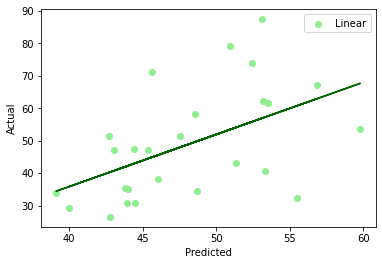

In [12]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print('Train: ' + str(reg.score(X_train,y_train)))
print('Test:' + str(reg.score(X_test,y_test)))

y_pred = reg.predict(X_test)
pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

x = pred['Predicted']
y = pred['Actual']
plt.scatter(x,y,color='lightgreen',label='Linear')
m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x+b,color='darkgreen')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.show()

In [13]:
dump(reg, r"C:\Users\Abigail\Desktop\linear_model2_joblib.model")

['C:\\Users\\Abigail\\Desktop\\linear_model2_joblib.model']

In [14]:
sq_error = mean_squared_error(y_test,y_pred)
ab_error = mean_absolute_error(y_test,y_pred)
rmse = math.sqrt(sq_error)
r2 = r2_score(y_test,y_pred)
print('Mean-Squared Error: ' + str(sq_error))
print('Root-Mean-Square Error: ' + str(rmse))
print('Mean Absolute Error: ' + str(ab_error))
print('R2: ' + str(r2))

Mean-Squared Error: 213.1772661740374
Root-Mean-Square Error: 14.600591295356411
Mean Absolute Error: 12.184824438074976
R2: 0.22685584116410373


C:\Users\Abigail\anaconda3\envs\powerbi\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Train: 0.20602827560301495
Test: 0.22651771144821475


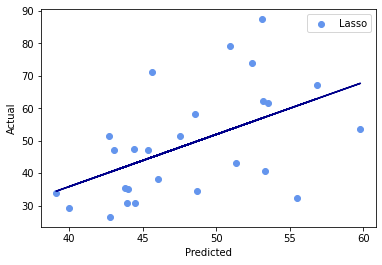

In [15]:
lasso = linear_model.Lasso(alpha=.001,normalize=True)
lasso.fit(X_train,y_train)

print('Train: ' + str(lasso.score(X_train,y_train)))
print('Test: ' + str(lasso.score(X_test,y_test)))

y_lasso_pred = lasso.predict(X_test)
lasso_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_lasso_pred})

x = pred['Predicted']
y = pred['Actual']
plt.scatter(x,y,color='cornflowerblue',label='Lasso')
m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x+b,color='darkblue')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.show()

In [16]:
sq_error_lasso = mean_squared_error(y_test,y_lasso_pred)
print('Mean-Squared Error: ' + str(sq_error))

Mean-Squared Error: 213.1772661740374


### Model #3: drops rows with 3 or more nulls + adds SO2_MEAN as feature, imputes remaining nulls w/ mean

In [17]:
# 92 rows remain
train3 = train[['NO2_MEAN','OZONE_MEAN','PM25_MEAN','SO2_MEAN','AGE_ADJ_ED_VISITS']]
train3.dropna(axis=0,how='any',thresh=4,inplace=True)
train3

C:\Users\Abigail\AppData\Local\Temp\ipykernel_16468\1312409429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train3.dropna(axis=0,how='any',thresh=4,inplace=True)


,NO2_MEAN,OZONE_MEAN,PM25_MEAN,SO2_MEAN,AGE_ADJ_ED_VISITS
3,15.998619,0.047622,9.169578,NaN,50.2
9,18.095623,0.055461,13.883374,1.301389,77.0
12,23.415915,0.050835,10.785424,2.368732,71.2
13,NaN,0.048910,5.590909,0.067763,53.5
14,22.760265,0.056779,16.773005,NaN,62.3
...,...,...,...,...,...
267,18.075582,0.045630,8.573770,NaN,57.9
271,22.578897,0.043112,7.876613,0.547839,23.9
278,15.145906,0.047547,8.450142,NaN,27.8
281,21.118895,0.056427,12.897345,NaN,40.2


In [18]:
X = train3[['NO2_MEAN','OZONE_MEAN','PM25_MEAN','SO2_MEAN']]
y = train3['AGE_ADJ_ED_VISITS'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
mean_imp = SimpleImputer(strategy='mean')
X_train.iloc[:,:] = mean_imp.fit_transform(X_train)
X_test.iloc[:,:] = mean_imp.fit_transform(X_test)

Train: 0.23375664021144882
Test:0.345283352201915


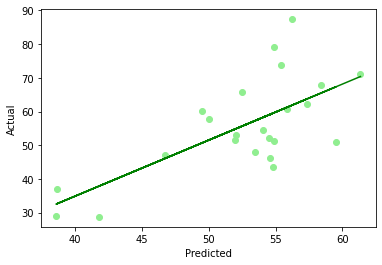

In [20]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print('Train: ' + str(reg.score(X_train,y_train)))
print('Test:' + str(reg.score(X_test,y_test)))

y_pred = reg.predict(X_test)
pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

x = pred['Predicted']
y = pred['Actual']
plt.scatter(x,y,color='lightgreen',label='Linear')
m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x+b,color='green')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
dump(reg, r"C:\Users\Abigail\Desktop\linear_model3_joblib.model")

['C:\\Users\\Abigail\\Desktop\\linear_model3_joblib.model']